In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_context("poster")
sns.set_style("whitegrid")

import sklearn
import scipy.stats as stats
import statsmodels.api as sm 

# special matplotlib argument for improved plots
from matplotlib import rcParams

In [6]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.data.shape)

(506, 13)


In [9]:
bos = pd.DataFrame(boston.data)
bos.columns = boston.feature_names
bos['PRICE'] = boston.target
bos.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14,21.6


In [10]:
X = bos.drop('PRICE', axis = 1)

In [14]:
import sklearn.model_selection

X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, bos.PRICE, test_size = 0.33, random_state = 5)
print ('X_Train', X_train.shape)
print ('X_Test',X_test.shape)
print ('Y_Train',Y_train.shape)
print ('Y_Test',Y_test.shape)

X_Train (339, 13)
X_Test (167, 13)
Y_Train (339,)
Y_Test (167,)


In [15]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [27]:
coeff_df = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
CRIM,-0.156381
ZN,0.038549
INDUS,-0.025063
CHAS,0.786440
NOX,-12.946912
RM,4.002689
AGE,-0.011602
DIS,-1.368288
RAD,0.341757
TAX,-0.013515


In [17]:
y_pred = lm.predict(X_test)

In [19]:
df = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})
df

,Actual,Predicted
226,37.6,37.467236
292,27.9,31.391547
90,22.6,27.120196
373,13.8,6.468433
273,35.2,33.629667
417,10.4,5.670680
503,23.9,27.039467
234,29.0,29.927047
111,22.8,26.356613
472,23.2,22.452460


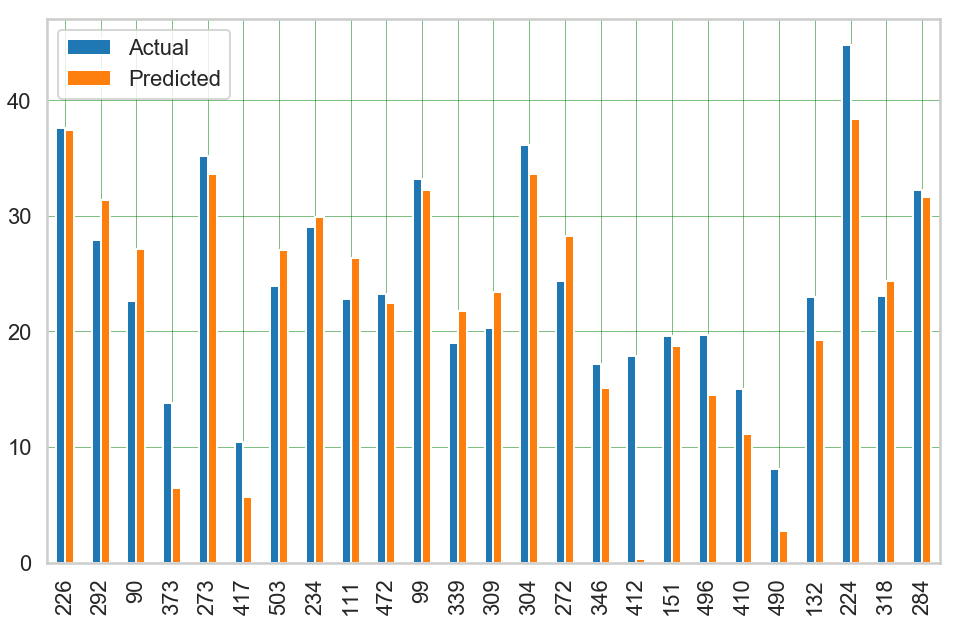

In [20]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [22]:
print ("Fit a model X_train, and calculate MSE with Y_train:", np.mean((Y_train - lm.predict(X_train)) ** 2))

Fit a model X_train, and calculate MSE with Y_train: 19.546758473534663


In [23]:
print ("Fit a model X_train, and calculate MSE with X_test, Y_test:", np.mean((Y_test - lm.predict(X_test)) ** 2)) 

Fit a model X_train, and calculate MSE with X_test, Y_test: 28.530458765974604


In [26]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))

Mean Absolute Error: 3.4550349322483482
Mean Squared Error: 28.530458765974583
Root Mean Squared Error: 5.341391089030514


In [32]:
bos.mean(axis=0)

CRIM         3.613524
ZN          11.363636
INDUS       11.136779
CHAS         0.069170
NOX          0.554695
RM           6.284634
AGE         68.574901
DIS          3.795043
RAD          9.549407
TAX        408.237154
PTRATIO     18.455534
B          356.674032
LSTAT       12.653063
PRICE       22.532806
dtype: float64

In [33]:
5.34/22.53

0.237017310252996